# More features, higher dimensios:Regresion de multivariada

Pueden haber mas "features" (atributos). Por ejemplo el problema
de la casa que quiero vender. El area no es suficiente , el precio de 
la casa depende de muchos parametros. Por 
* numero de cuartos
* area



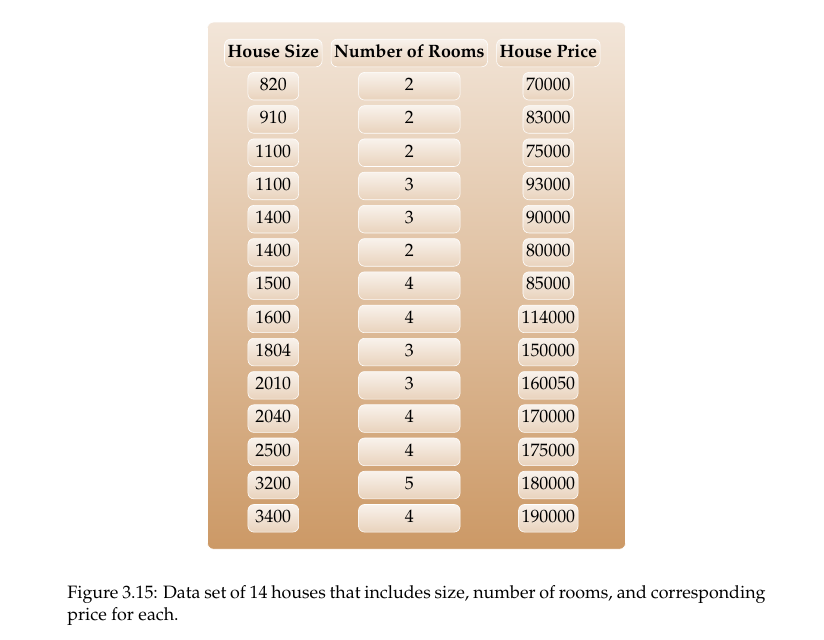

La hipotesis que planteamos (lineal)

$$h(\theta_0, \theta_1, \theta_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2  $$

Se tienen datos

Para el ejemplo $x_{ij}$ , $i$ es el numero de la casa $i=1,2, \cdots, m$
y $j$ es $j=1$ area $j=2$ numero de cuartos

\begin{eqnarray}
y_1 = h(\theta_0, \theta_1, \theta_2) &=& \theta_0 + \theta_1 x_{11} + \theta_2 x_{12}   \\
y_2 = h(\theta_0, \theta_1, \theta_2) &=& \theta_0 + \theta_1 x_{21} + \theta_2 x_{22} \\
&\vdots &\\
y_m = h(\theta_0, \theta_1, \theta_2) &=& \theta_0 + \theta_1 x_{m1} + \theta_2 x_{m2}
\end{eqnarray}

En forma matricial, para los datos que tenemos en la figura anterior

$$ X \theta = y$$

Donde 

\begin{eqnarray}
X= \begin{pmatrix}
1 & 820 & 2 \\
1 & 910 & 2 \\
1 & 1100 & 2 \\
1 & 1400 & 3 \\
\vdots & \vdots & \vdots \\
1 & 2500 & 4 \\
1 & 3200 & 4 \\
1 & 3400 & 4
\end{pmatrix}
\quad , \quad \theta = \begin{pmatrix}  \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix} \quad , \quad 
y= \begin{pmatrix} 70000 \\ 83000 \\ 75000 \\ 93000 \\ \vdots \\ 175000 \\18000 \\ 190000  \end{pmatrix}
\end{eqnarray}


se pude resolver con minimos cuadrados. Es decir
se miniza 

$$\frac12 \| h(\theta) - y \|^2 = \frac12 \| X \theta - y \|^2 $$

La solucion en minimos cuadrados es:

$$ X \theta = y $$
$$ X^T X \theta = X^T y $$
Si $X^T X$ tiene inversa la solucion es

$$ \theta = (X^T X)^{-1} X^T y$$
Que $X^T X$ no tiene inversa o el $\kappa$ (condition number) es muy grande
se regulariza

$$\theta = (X^T X + \lambda I)^{-1} X^T y  $$

donde $\lambda > 0$. 

Hay tres formas (y son muchas mas) para resolver $X \theta = y$.

* Usar la pseudoinversa $\theta = X^+ y$
* Haciendo regularizacion $$ \theta = (X^T X)^{-1} X^T y$$
* Otra es con el gradiente.

Recuerde la funcion objetivo

$$J(\theta) = \frac12 \| h(\theta) - y \|^2 + \lambda \| x \|^2  $$
Se halla $\nabla_{\theta} J$ y se usa cualesquiera de los metodos indicados en las dos ultimas clases.





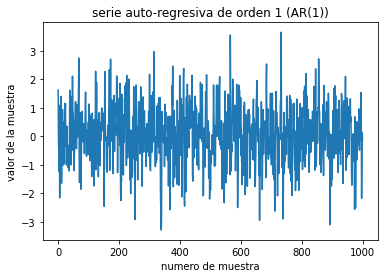

In [ ]:
#ejemplo con series de tiempo

# Regresion Lineal Multivariada
import numpy as np
import matplotlib.pyplot as plt

# generamos un ruido normal 0, 1
np.random.seed(1)
mu, sigma=0, 1
N=1000
Z = np.random.normal(mu, sigma, N)

# generamos una serie de tiempo

phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1, N):
    X[t] = Z[t]+ phi* X[t-1]

# graficamos:
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("serie auto-regresiva de orden 1 (AR(1))")
plt.plot(X)
plt.show();



In [ ]:
# creamos las variables aleatorias $X_{t-1}, X_{t-2} , X_{t-3}$

n=X.size
k=4

Y=np.zeros( shape=(k,n), dtype='float')

Y[0] = X
for i in range (1, k):
    Y[i][:-i] = X[i:]


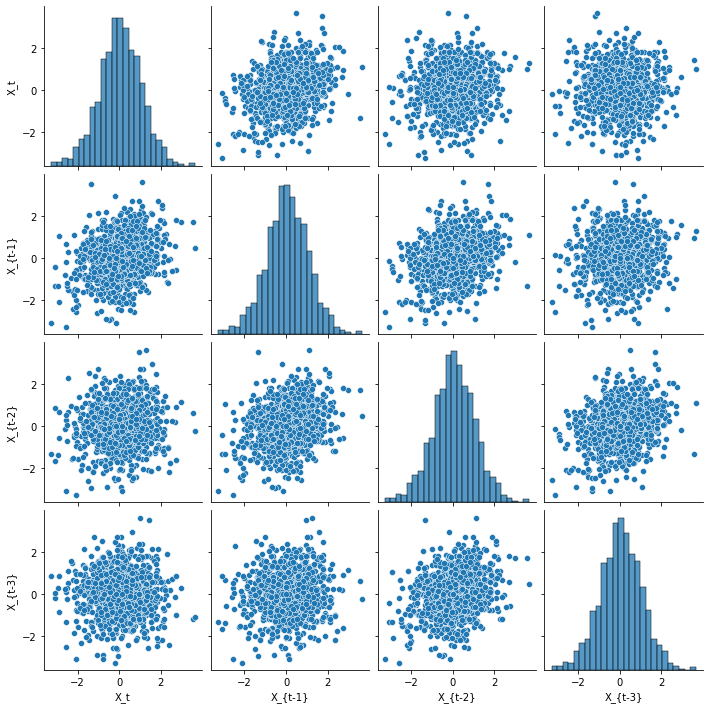

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# crear un dataframe 
data = np.transpose(Y)
df = pd.DataFrame(data)

X1="X_t"
X2="X_{t-1}"
X3="X_{t-2}"
X4="X_{t-3}"

df.columns=[X1, X2, X3, X4]
sns.pairplot(df);

In [ ]:
# pd.plotting.scatter_matrix(df, alpha=0.4)

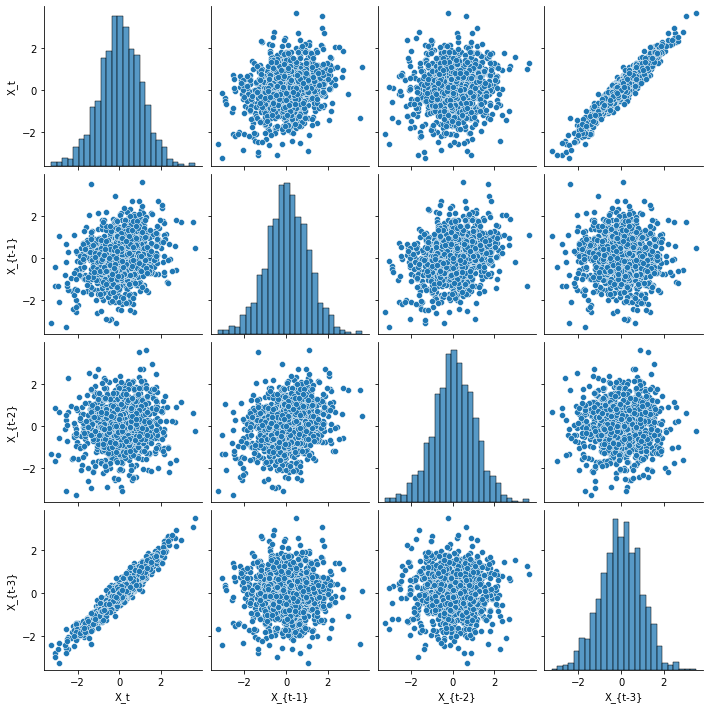

In [ ]:
# vamos a hacer una regresion multiple.
# encontramos la dependencia lineal de $X_t$ con 
# respecto a $X_{t-1}, X_{t-2}, X_{t-3}$ y luego la restaoms
# vemos que relacion hay  entre $X_t $ y $X_{t-3$ despues de remover
# la dependencia lineal

# columna de unos agragada
ones = np.ones( shape=(n,1), dtype='float')
Xmat = np.column_stack( (ones, Y[1]))

# las demas
for i in range(2, k-1):
    # stack Y columns
    Xmat = np.column_stack( (Xmat, Y[i]))



# toca construir la solucion con ecuaciones normales
XT = Xmat.transpose()
XTX = XT.dot(Xmat)
XTXInv = np.linalg.inv(XTX)
b=np.matmul( XT, Y[0])
theta= XTXInv.dot(b)


# la regresion lineal multivariada esta lista
Y_reg = theta[0] + sum( theta[j]*Y[j] for j in range(1, k-1))

# restemos esta regresion de $X$ para ver que se removio la dependencia de X_{t-1} X_{t-2}
Y_t = X - Y_reg
Y[k-1]=Y_t

# creamos el dataframe para los nuevos datos 
data=np.transpose(Y)
df=pd.DataFrame(data)
X1="X_t"
X2="X_{t-1}"
X3="X_{t-2}"
X4="X_{t-3}"

df.columns=[X1, X2, X3, X4]
sns.pairplot(df);

### Feature Normalization: Normalizacion de atributos.

Motivacion: Recuerde el problema de las casa. El numero de cuartos esta entre 1 y 4, mientras que el area esta en los miles. Estas dos escalas son muy distintas. 

el normalizar los datos tiene beneficios:
* Aumenta la velocidad del algortmo si es por ejemplo con el metodo del gradiente (disminuye el zigzageo)

* Aumenta la precision. Al disminuir el "condition number " ($\kappa$) 
* Creea una distancia mas razonable que no se deja sesgar de valores muy grandes en una dimension y pequenos en otra

Metodos de normalizacion:

* *Estandarizacion*: Se le resta la media a cada columna (recuerde que los datos son una matriz $X$ de $m$ filas y $n$ columnas) y se divide por la desviacion estandard. Es decir. Si $X_j$ es la columna $j$ de la matriz $X$

$$ X_j \leftarrow \frac{X_j - \mu_j }{\sigma_j}  $$

donde

\begin{eqnarray}
\mu_j = \frac{\sum_{i=1}^m x_{ij}}{m}  \\
\sigma = \sqrt{ \frac{\sum_{i=1}^m (x_{ij} - \mu_j)^2}{m}}
\end{eqnarray}

* *Normalizacion por la media* : Remueve la media columna por columna y divide por el *rango* es decir por la diferencia entre el maximo y el minimo de cada columna.

$$ X_j := \frac{X_j - \mu_j}{\max_i \{ x_{ij} \} - \min_i \{x_{ij} \}}  $$

* *Min-Max scaling*: 

$$ X_j := \frac{X_j - \min_i \{x_{ij}\}}{\max_i \{ x_{ij} \} - \min_i \{x_{ij} \}}  $$

* *Vector normalizacion*: 

$$ X_j := \frac{X_j}{ \| X_j \| } $$

Cual se debe usar? Depende de cada problema, de los datos.







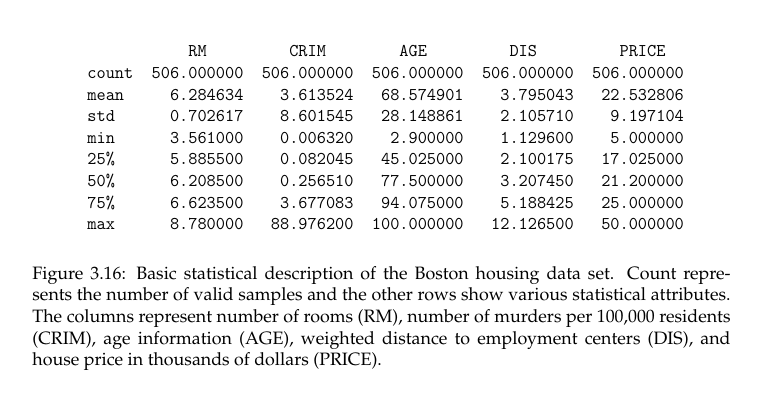

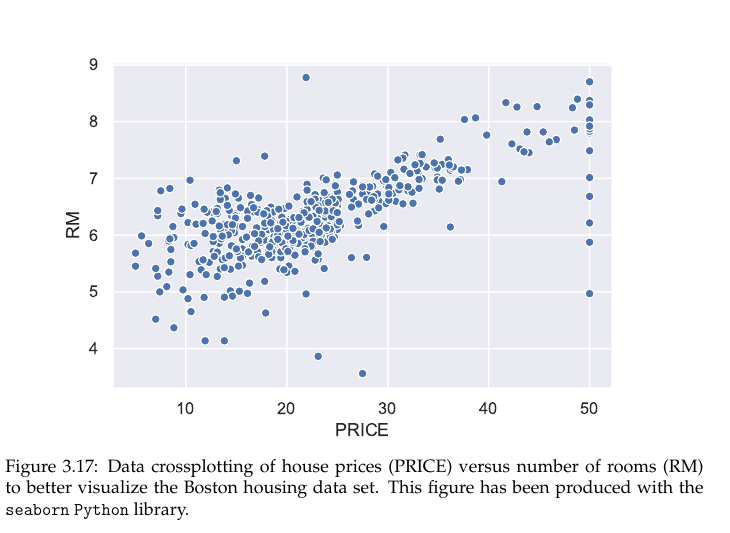

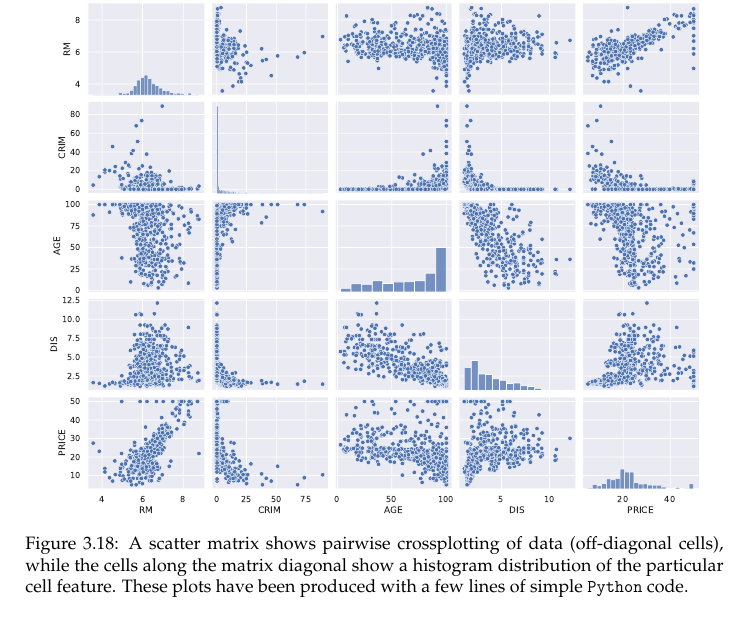

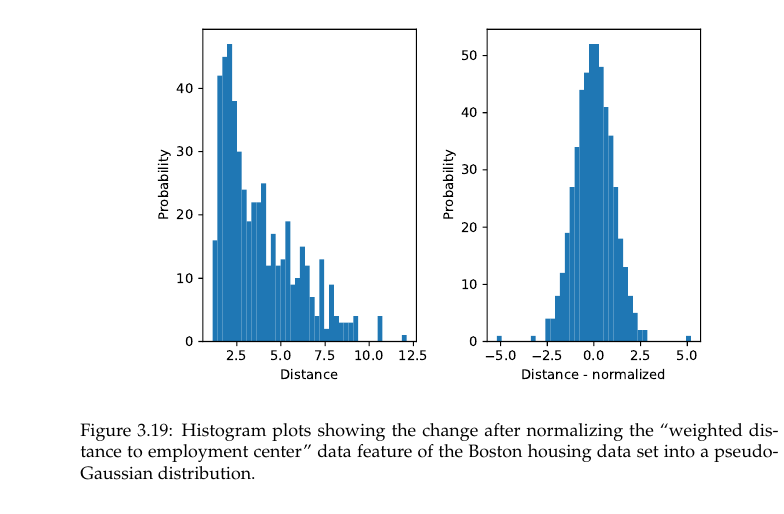

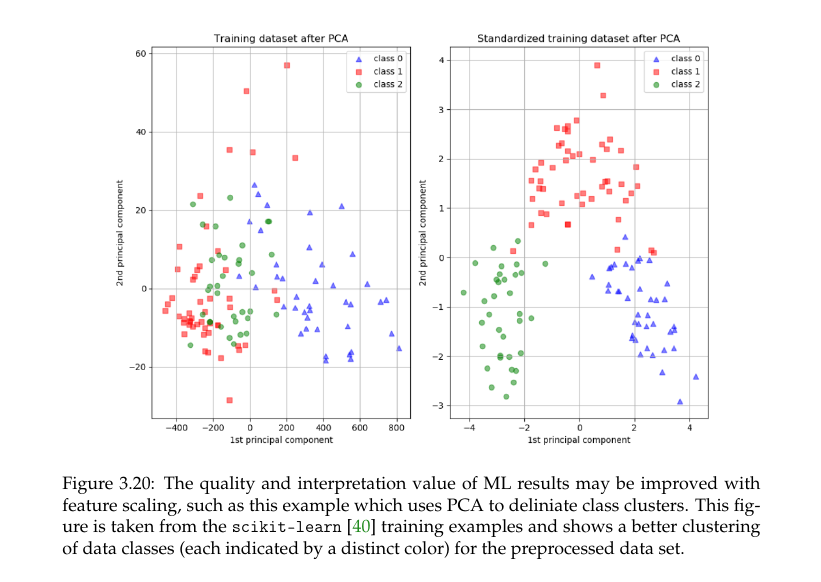

## Regresion polinomial en una variable


Cuando hablamos de regresion lineal multivariada nos referimos a varios $\theta_i$,  un ejemplo intersante es establecer la siguiente hipotesis polinomica:

$$h(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_n x^n $$


Esto se puede escribir de forma matricial como $h(\theta, x) = X \theta$ 
donde $X$ es una matriz de $m$ filas por $n+1$ columnas

\begin{eqnarray}
h(\theta, x_1) &=& \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \cdots + \theta_n x_1^n \\ 
h(\theta, x_2) &=& \theta_0 + \theta_1 x_2 + \theta_2 x_2^2 + \cdots + \theta_n x_2^n \\ 
&\vdots&\\
h(\theta, x_m) &=& \theta_0 + \theta_1 x_m + \theta_2 x_m^2 + \cdots + \theta_n x_m^n \\ 
\end{eqnarray}



Matricialmente tenemos $y=X \theta$
con

\begin{eqnarray}
X = \begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & \cdots & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & \cdots & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & \cdots & \cdots & \cdots & x_m^n
\end{pmatrix}  \quad , \quad 
\theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \vdots \\ \theta_n \end{pmatrix}
\end{eqnarray}

Es posible que $X$ sea una matriz cuadrada: $m=n+1$. En este caso
a esta matriz se le conoce como la matriz de Vandermonde $V$.

[matriz de Vandermone](https://en.wikipedia.org/wiki/Vandermonde_matrix)

Esta matriz representa Lagrange Interpolation. Interpolacion de Lagrange.

Es interesante que hay una relacion entre 
*interpolacion* y  *regresion*

*regresion* se convierte en interpolacion cuando $m=n+1$.

Pero casi nunca pasa. No se recomienda usar regresion para interpolar por que crea un fenomeno que se llama overfitting
(sobre ajuste) lo veremos en la segunda parte de esta clase).



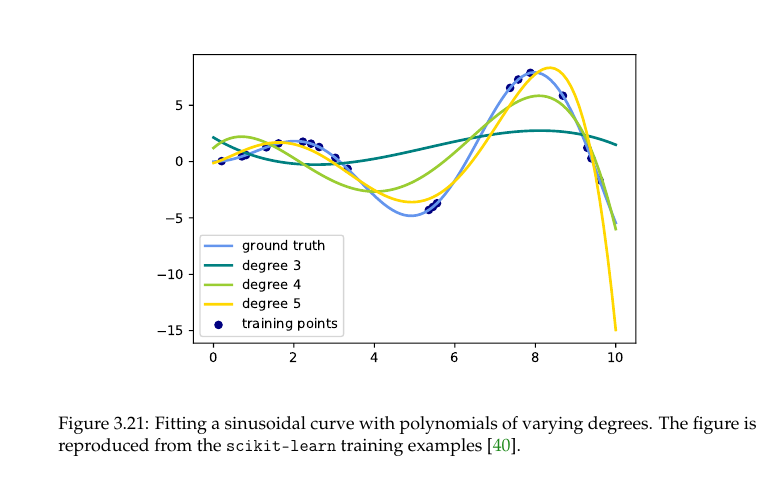

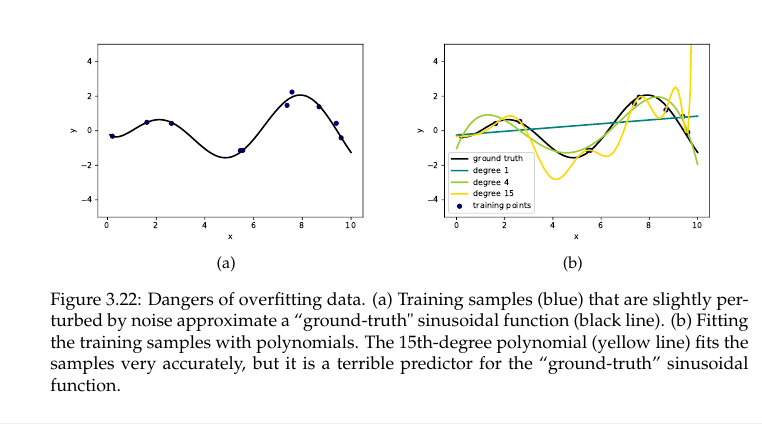

### interpolacion polinomica en varias variables

Generalicemos a polinomios de orden 2 en 2 variables:

$$h(\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5 ,x_1, x_2)= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2  $$



La matriz $X$ del problema $X \theta =y $

\begin{eqnarray}
X = \begin{pmatrix}
1 & x_{11} & x_{12} & x_{11} x_{12} & x_{11}^2 & x_{12}^2 \\
1 & x_{21} & x_{22} & x_{21} x_{22} & x_{21}^2 & x_{22}^2  \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{m1} & x_{m2} & x_{m1} x_{m2} & x_{m1}^2 & x_{m2}^2 
\end{pmatrix}
\end{eqnarray}

## Underfitting/ Overfitting (sub y sobre ajuste)

Muchas veces, si tratamos de ser muy precisos al solucionar un problema en Machine learning, podemos
cometer el error "de memorizar" de ajustarnos *demasiado* bien a los datos que tenemos a mano, al punto de que cuando nos dan datos nuevos ya no funcionan los parametros $\theta$ obtenidos. 

Volvamos a la curva de arriba. $f(x)=\log(x) \sin(x)$

Como se puede evitar el overfitting:

* En general $m \gg n$ ($n$ es el numero de "features"). Reducir el numero features pero,
ni tanto que queme al santo ni tan poco que no lo alumbre. "Tradeoff" Si $n$ es muy pequeno tenemos underfitting, si es muy grande overfitting. 

* Polinomios de grado alto oscilan muy  rapido y en los bordes se "desbordan" (se van lejos, a esto se le llama el fenomeno de Runge.

* Overfitting sufre con el ruido en los datos. Las "curvas" tienen a seguir el ruido de cerca. Limpiar de ruido (si es posible).

* El overfitting causa usar recursos innecesarios. Por ejemplo matrices my grandes. Yo quiero hacer $n$ grande para que se ajuste mejor, $n \approx m$. Esto implica un gran costo. Polinomios de alto grado generan procesos mas costosos (de mas variables).

* Aplicar regularizacion. 
* Guarde datos para probar. 

## regularizacion de polinomios




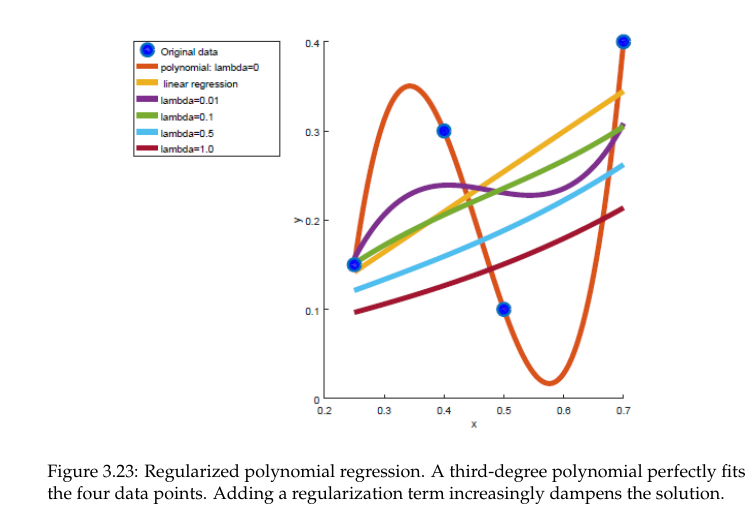

## K-fold cross-validation.

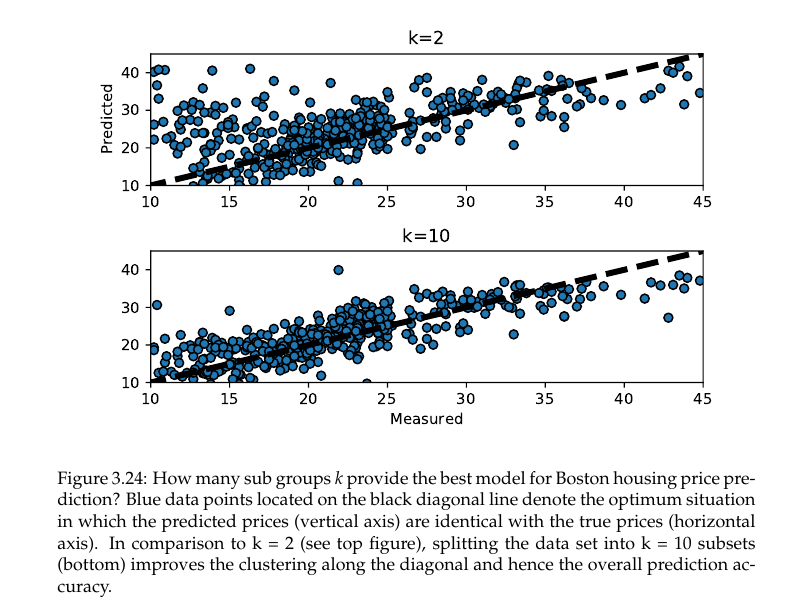